In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
from datetime import date
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# Usinf Base class to reflect the tables
Base.prepare(engine,reflect=True)
#This copies the structure of the pre-existing database

In [8]:
# We can view all of the classes that automap found
tables = Base.classes.keys()
tables

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes['measurement']
Station = Base.classes['station']

In [10]:
#Building an inspector function
inspector = inspect(engine)
#help(inspector)

In [11]:
#Looking at what is in the measurement class or table
meas_col=inspector.get_columns('Measurement')
for col in meas_col:
    print(col['name'],col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#Looking at what is in the station class or table
stat_col=inspector.get_columns('Station')
for col in stat_col:
    print(col['name'],col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [40]:
#This is running a query for all the all dates and precipitation and 
#storing it into a data frame so I can do analysis on it
precip = session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date.desc()).all()
precip_df = pd.DataFrame(precip,columns=['date','prcp'])

#Converting to datetime
precip_df['date'] = pd.to_datetime(precip_df['date'])

precip_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
19545,2010-01-01,0.21
19546,2010-01-01,0.15
19547,2010-01-01,0.15
19548,2010-01-01,0.05


In [15]:
#This is getting the most recent date in the database
last_date = precip_df.iloc[0]['date']
last_date = pd.to_datetime(last_date)
print(last_date)

#Getting date from 12 months ago
query_date = last_date + relativedelta(months=-12)
query_date = pd.to_datetime(query_date)
print(query_date)

2017-08-23 00:00:00
2016-08-23 00:00:00


In [16]:
#Here I am filtering only the dates after our query date
last12mo_df = precip_df.loc[precip_df["date"] >= query_date, :]

#Dropping null rows and displaying dataframe
last12mo_df = last12mo_df.dropna(how = 'any')
last12mo_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2224,2016-08-23,0.15
2225,2016-08-23,0.05
2227,2016-08-23,0.02
2228,2016-08-23,1.79


<function matplotlib.pyplot.show(*args, **kw)>

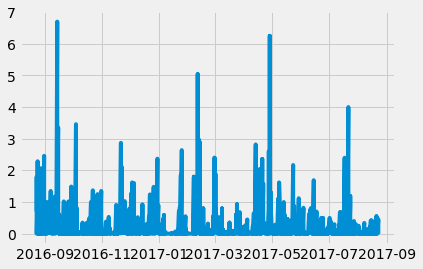

In [17]:
x = last12mo_df['date']
y = last12mo_df['prcp']

plt.plot(x,y)
plt.show

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [19]:

#Stuff maybe ill use later

# #Here, I am grouping the data by date because there are four stations
# precip_df = precip_df.groupby(['date']).mean()
# precip_df = precip_df.sort_values(by=['date'], ascending=False)


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last12mo_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [41]:
# Design a query to show how many stations are available in this dataset?
station = session.query(Station.id,Station.name,Station.station).all()
station_df = pd.DataFrame(station,columns=['id','name','station'])
unique_count = station_df['station'].nunique()

#print(f'There are {unique_count} stations in the dataset.')
kust = station_df['station']
kust

0    USC00519397
1    USC00513117
2    USC00514830
3    USC00517948
4    USC00518838
5    USC00519523
6    USC00519281
7    USC00511918
8    USC00516128
Name: station, dtype: object

In [22]:
#This is pulling all the columns into two dataframes
measure_all = session.query(Measurement).statement
measure_all_df = pd.read_sql_query(measure_all,session.bind)
#measure_all_df.head()

station_all = session.query(Station).statement
station_all_df = pd.read_sql_query(station_all,session.bind)
#station_all_df.head()

In [23]:
#This is a merge of the two databases for info needed below
merge_db = pd.merge(measure_all_df,station_all_df,on="station")
merge_db

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = merge_db.groupby(merge_db['station'])
row_count = most_active['tobs'].count()
row_count = row_count.to_frame()
row_count = row_count.sort_values(['tobs'],ascending=False)
row_count

,tobs
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [37]:
#This is the station with the most data
max_data = row_count.max()
max_station = row_count.loc[row_count['tobs'] == max_data[0]]
max_station

,tobs
station,
USC00519281,2772


In [39]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station = merge_db.loc[merge_db['station']== max_station.index[0]]
min_temp = active_station['tobs'].min()
max_temp = active_station['tobs'].max()
avg_temp = active_station['tobs'].mean()

print(f'The most active station, {max_station.index[0]}, \
had a max temp of {max_temp}, \n a minimum temp of {min_temp}, \
and an average temp of {round(avg_temp,1)}')

The most active station, USC00519281, had a max temp of 85.0, 
 a minimum temp of 54.0, and an average temp of 71.7


In [ ]:
date_temp = active_station[['date'],['tobs']]
date_temp

2017-08-18 00:00:00
2016-08-18 00:00:00


<ipython-input-27-21c525bd89a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_station['date'] = pd.to_datetime(active_station['date'])


<function matplotlib.pyplot.show(*args, **kw)>

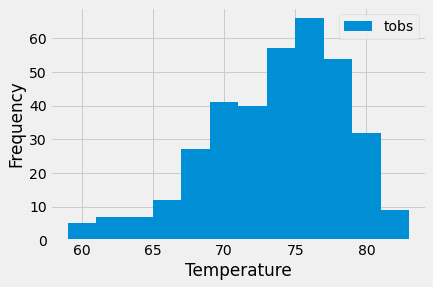

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Converting to datetime and sorting by most recent date
active_station['date'] = pd.to_datetime(active_station['date'])
active_station = active_station.sort_values(['date'],ascending=False)

#This is getting the most recent date in the database
lastdate = active_station.iloc[0]['date']
lastdate = pd.to_datetime(lastdate)
print(lastdate)

#Getting date from 12 months ago
query_date = lastdate + relativedelta(months=-12)
query_date = pd.to_datetime(query_date)
print(query_date)

#Here I am filtering only the dates after our query date
last12mo_merge = active_station.loc[active_station["date"] >= query_date, :]

#Creating the histogram plot
x = last12mo_merge['tobs']
label = ['tobs']
plt.hist(x,bins = 12)
plt.legend(labels = label)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show

## Bonus Challenge Assignment

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [35]:
# Plot the daily normals as an area plot with `stacked=False`
